# How to build a simple IR System

The following tasks have to be accomplished in order to build a simple IR system

## Data Collection

The NLTK package includes a nice list of documents that can be loaded.

### Project Gutenberg Selections
http://gutenberg.net/

This corpus contains etexts from from Project Gutenberg,
by the following authors:

* Jane Austen (3)
* William Blake (2)
* Thornton W. Burgess
* Sarah Cone Bryant
* Lewis Carroll
* G. K. Chesterton (3)
* Maria Edgeworth
* King James Bible
* Herman Melville
* John Milton
* William Shakespeare (3)
* Walt Whitman

The beginning of the body of each book could not be identified automatically,
so the semi-generic header of each file has been removed, and included below.
Some source files ended with a line "End of The Project Gutenberg Etext...",
and this has been deleted.

How do we access corpora? 

Hit the link below:
[How do we access corpora? ](https://www.nltk.org/book/ch02.html)

In [2]:
import nltk

# download all necessary corpora
#downloaded to
# C:\Users\bky\AppData\Roaming\nltk_data\corpora\gutenberg
nltk.download(["gutenberg", "stopwords"])

# get a list of all FILES in corpus
ids = nltk.corpus.gutenberg.fileids()

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\bky\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
print(len(ids))
print(ids)

18
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


Let's pick out the first of these texts — Emma by Jane Austen — and give it a short name, emma, then find out how many words it contains:

In [ ]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
for word in emma:
        print(word, end=" ")

In [52]:
# load all files from gutenberg corpus

def load_corpus():
    return [nltk.corpus.gutenberg.words(id) for id in ids]

#the function load_corpus() contains a list of all documents
"""list Documents (
        list lines of a document x.txt (
             list words in line i of document x.txt))"""
x = load_corpus() 
print(load_corpus(), "\n\n")

#
print(x[0])  # List of lines (list of words on a single line) from Austin Emma.txt
print(x[1])  # List of lines (list of words on a single line)  from austen-persuasion.txt
print(x[2], "\n\n")

k =1
for i in x:
    print(k,".",i)
    k += 1

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...], ['[', 'Persuasion', 'by', 'Jane', 'Austen', '1818', ...], ['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', ...], ['[', 'The', 'King', 'James', 'Bible', ']', 'The', ...], ['[', 'Poems', 'by', 'William', 'Blake', '1789', ']', ...], ['[', 'Stories', 'to', 'Tell', 'to', 'Children', 'by', ...], ['[', 'The', 'Adventures', 'of', 'Buster', 'Bear', ...], ['[', 'Alice', "'", 's', 'Adventures', 'in', ...], ['[', 'The', 'Ball', 'and', 'The', 'Cross', 'by', 'G', ...], ['[', 'The', 'Wisdom', 'of', 'Father', 'Brown', 'by', ...], ['[', 'The', 'Man', 'Who', 'Was', 'Thursday', 'by', ...], ['[', 'The', 'Parent', "'", 's', 'Assistant', ',', ...], ['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', ...], ['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', ...], ['[', 'The', 'Tragedie', 'of', 'Julius', 'Caesar', ...], ['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', ...], ['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', ...], ['[', 'Leaves', 'of', 'Grass'

## Data Preprocessing
In order to provide a common basis for information retrieval, in the following we have to execute some preprocessing steps.

### Tokenisation

With respect to tokenization, three options are available. 
1. Use integrated nltk tokens
2. Create own simple tokenizer
3. Implement tokenizer based on pos tags

For the beginning, we just use the integrated tokenizer and use the provided documents as is. 

### Casefolding

Casefolding tries to create a common case for all documents. Basically there are two options:
1. tolower() - which simply translates all capital case letters to lower case
2. casefold() - which also translates common letters 

The `casefold()` method is removes all case distinctions present in a string. It is used for caseless matching, i.e. ignores cases when comparing.

**For example**, German lowercase letter ß is equivalent to ss. However, since ß is already lowercase, lower() method does nothing to it. But, casefold() `converts ß  to ss`.


`.split()` method **splits the sentence** in the file and stores each word in list with list name testfile


In [53]:
# casefold each word in file
def casefold_file(file):
    return [word.casefold() for word in file]  #list comprehension,  "file" is our iterable

# Test if the implementation actually works
#split method automatically creates a list
# We must use list type, tuple is NOT MUTABLE,
testfile = "This is a Test For Casefolding: Schloß".split() 

print("Before Casefolding: ",testfile)
cf_testfile = casefold_file(testfile)

print("After casefolding :",cf_testfile)


Before Casefolding:  ['This', 'is', 'a', 'Test', 'For', 'Casefolding:', 'Schloß']
After casefolding : ['this', 'is', 'a', 'test', 'for', 'casefolding:', 'schloss']


In [54]:
# Iterates all files in a given corpus and runs casefold
def casefold_corpus(corpus):
    return [casefold_file(file) for file in corpus]

## Normalisation

Since the corpus still contains a lot of characters that have to meaning, we could now start removing them. Here, we use a regular expression to replace all unnecessary characters. Again, we first define a function for single files, check if it works and then define a functions that applies it to the entire corpus.

- `sub()` is a function in re module, 
- accessed from the module as `re.sub()`
- `Substitute` occurrences of a pattern found in a string

**re.sub(pattern, repl, string, count=0, flags=0)**

- Return the string obtained by `replacing the leftmost non-overlapping occurrences` of the `pattern` in string by the
- replacement repl.  repl can be either a string or a callable;

- if a string, backslash escapes in it are processed.  
- If it is a callable, it's passed the Match object and must return a replacement string to be used.

In [84]:
import re
# regular expression to remove all unnecessary characters
characters_to_remove = "[\[\]\(\){},.!\?;:\-_'\"]"

# iterate the file, clean the words and remove empty strings
def clean_file(file, removelist):
    return [token for token in [re.sub(removelist,'',word) for word in file] 
            if token != ''] # this is NESTED list comprehesnsion!!! 

# test the implementation 
testfile = "! this, is a :;-_!) test sentence".split()
cl_testfile = clean_file(testfile, characters_to_remove)
print("The result of cleaning is:", cl_testfile)

The result of cleaning is: ['this', 'is', 'a', 'test', 'sentence']


In [77]:
re.sub?

In [85]:
def clean_corpus(files):
    return [clean_file(file,characters_to_remove) for file in files]  # list comprhesnion

### Stop word removal

In order to `reduce the size of the corpus, we can now remove the most common words`. For this purpose, we first load the `stopwords corpus` from the NLTK package and then filter the document by use of this list.

In [86]:
stopwords_en = nltk.corpus.stopwords.words("english")

# select only words from the first list which are not in the second list
def filter_words(file, wordlist):
    result = list(filter(lambda w: not w in wordlist, file))
    return result
# the previous function can conventionelly be written as follows
#def filter_words2(file, wordlist):
#    result = []
#    for word in file:
#        if not word in wordlist:
#            result.append(word)
#    return result

# test implementation
testfile = "This is just a test for about".split()
sw_testfile = filter_words(testfile, stopwords_en)
print("The result of removing stopwords is:", sw_testfile)

The result of removing stopwords is: ['This', 'test']


In [58]:
# removes all stop words from the entire corpus
def remove_stopwords_corpus(corpus):
    return[filter_words(file, stopwords_en) for file in corpus]

### Stemming

In [89]:
# use porter's stemmer to stem all tokens in all files
ps = nltk.stem.PorterStemmer() #name PorterStemmer() as ps for ease of use

# stems all words in a file
def stem_file(file):
    return [ps.stem(token) for token in file]

# test the implementation
testfile = "This is a testing sentence file filled with a list of highly vocabulariazed words".split()
st_testfile = stem_file(testfile)
print("Result of the stemming:", st_testfile)

Result of the stemming: ['thi', 'is', 'a', 'test', 'sentenc', 'file', 'fill', 'with', 'a', 'list', 'of', 'highli', 'vocabulariaz', 'word']


In [90]:
def stem_corpus(corpus):
    return [stem_file(file) for file in corpus]

## Prepare the Corpus for IR

We now implemented some functions to preprocess the corpus. Let's see how the corpus' statistics changes when these functions are applied.

In [61]:
# We use pandas here as it provides some nice functionality for #showing tables
import pandas as pd
import collections

# Functions returns statistics about all files in the corpus
def report(corpus):
    return ["%s / %s" % (len(document), len(collections.Counter(document))) for document in corpus]


# Header of the table
df = pd.DataFrame(columns=nltk.corpus.gutenberg.fileids())

# load the corpus and report number words and unique number of words
corpus = load_corpus()
df.loc["raw"] = report(corpus)

# casefold all words and report statistics
corpus = casefold_corpus(corpus)
df.loc["case"] = report(corpus)

corpus = clean_corpus(corpus)
df.loc["clean"] = report(corpus)

corpus = remove_stopwords_corpus(corpus)
df.loc["stop words"] = report(corpus)

corpus = stem_corpus(corpus)
df.loc["stemming"] = report(corpus)

df

,austen-emma.txt,austen-persuasion.txt,austen-sense.txt,bible-kjv.txt,blake-poems.txt,bryant-stories.txt,burgess-busterbrown.txt,carroll-alice.txt,chesterton-ball.txt,chesterton-brown.txt,chesterton-thursday.txt,edgeworth-parents.txt,melville-moby_dick.txt,milton-paradise.txt,shakespeare-caesar.txt,shakespeare-hamlet.txt,shakespeare-macbeth.txt,whitman-leaves.txt
raw,192427 / 7811,98171 / 6132,141576 / 6833,1010654 / 13769,8354 / 1820,55563 / 4420,18963 / 1764,34110 / 3016,96996 / 8947,86063 / 8299,69213 / 6807,210663 / 9593,260819 / 19317,96825 / 10751,25833 / 3560,37360 / 5447,23140 / 4017,154883 / 14329
case,192427 / 7344,98171 / 5835,141576 / 6403,1010654 / 12767,8354 / 1535,55563 / 3940,18963 / 1559,34110 / 2636,96996 / 8335,86063 / 7794,69213 / 6349,210663 / 8447,260819 / 17231,96825 / 9021,25833 / 3032,37360 / 4716,23140 / 3464,154883 / 12452
clean,162095 / 7105,84201 / 5779,120795 / 6339,854046 / 12744,6953 / 1513,46715 / 3838,16359 / 1527,27396 / 2571,82938 / 8246,73355 / 7740,58732 / 6306,170879 / 8345,218668 / 17142,80509 / 8982,20881 / 3020,30296 / 4702,18370 / 3452,126606 / 12406
stop words,73412 / 6974,38417 / 5646,54048 / 6204,437149 / 12619,3824 / 1403,21790 / 3700,7594 / 1388,12301 / 2425,39937 / 8098,35417 / 7592,28336 / 6165,78273 / 8196,110766 / 16996,45584 / 8856,11135 / 2917,15928 / 4593,10176 / 3345,65410 / 12271
stemming,73412 / 4377,38417 / 3688,54048 / 3985,437149 / 9418,3824 / 1145,21790 / 2808,7594 / 1126,12301 / 1834,39937 / 5706,35417 / 5435,28336 / 4480,78273 / 5476,110766 / 10716,45584 / 6170,11135 / 2361,15928 / 3653,10176 / 2749,65410 / 8205


## Term-Document Matrix

The Term-Document-Matrix allows to store the frequency of each term in each document. 

In [62]:
import collections
import pprint

def summarize_corpus(corpus):
    counters = [collections.Counter(file) for file in corpus]

    # create empty counter
    counter_tmp = collections.Counter()
    
    # iterate counter and sum up
    for c in counters:
        counter_tmp += c
    return (counter_tmp, counters)

# test the implementation
testcorpus = ["This is the first document".split(), "This is the second document".split()]
testcorpus_counter, testcorpus_documents = summarize_corpus(testcorpus)

pp = pprint.PrettyPrinter(indent=4)
print("Information about the entire corpus:")
pp.pprint(testcorpus_counter)
print("Information about each document:")
pp.pprint(testcorpus_documents)

Information about the entire corpus:
Counter({'This': 2, 'is': 2, 'the': 2, 'document': 2, 'first': 1, 'second': 1})
Information about each document:
[   Counter({'This': 1, 'is': 1, 'the': 1, 'first': 1, 'document': 1}),
    Counter({'This': 1, 'is': 1, 'the': 1, 'second': 1, 'document': 1})]


In [63]:
# Run corpus summary on each document
counter_corpus, counters_documents = summarize_corpus(corpus)
print("The corpus consists of", sum(counter_corpus.values()), "tokens and", len(counter_corpus), "terms.")
print("The dimension of the respective TDM is", len(corpus), "times", len(counter_corpus))

The corpus consists of 1089497 tokens and 25823 terms.
The dimension of the respective TDM is 18 times 25823


### Create the Term-Document Matrix
The Term-Document Matrix ist created by first getting the number of unique words among the entire corpus and then collecting the frequencies of those in the respective documents.

The function is then applied to the small text corpus.

In [64]:
import numpy as np

# create a Term Document Matrix from the corpus
def create_term_document_matrix(corpus):
    # get the summary of the corpus
    counter_corpus, counter_documents = summarize_corpus(corpus)
    
    # create an empty matrix with the correct dimension
    tdm = np.zeros((len(counter_corpus),len(corpus)))

    for idx, word in enumerate(counter_corpus):
        for document_id in range(len(corpus)):
            if word in counter_documents[document_id]:
                tdm[idx,document_id] = counter_documents[document_id][word]
    return (tdm,list(counter_corpus.keys()))
            
# test the implementation
test_tdm, test_names = create_term_document_matrix(testcorpus)

df = pd.DataFrame(test_tdm, index=test_names)
df

,0,1
This,1.0,1.0
is,1.0,1.0
the,1.0,1.0
first,1.0,0.0
document,1.0,1.0
second,0.0,1.0


In the resulting Term-Document Matrix it can be seen which words are contained in with documents. The word _first_ for instance is in _document 0_, only while the word _This_ is in both documents.

We now create the matrix for the preprocessed corpus of gutenberg documents. 

In [65]:
# create the actual TDM from the corpus
tdm, names = create_term_document_matrix(corpus)
pd.DataFrame(tdm, index=names, columns=nltk.corpus.gutenberg.fileids())

,austen-emma.txt,austen-persuasion.txt,austen-sense.txt,bible-kjv.txt,blake-poems.txt,bryant-stories.txt,burgess-busterbrown.txt,carroll-alice.txt,chesterton-ball.txt,chesterton-brown.txt,chesterton-thursday.txt,edgeworth-parents.txt,melville-moby_dick.txt,milton-paradise.txt,shakespeare-caesar.txt,shakespeare-hamlet.txt,shakespeare-macbeth.txt,whitman-leaves.txt
emma,865.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jane,301.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
austen,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
volum,3.0,6.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,15.0,0.0,2.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
glum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
demarc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
cumul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
germin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Querying the Term-Document matrix

In order to check whether a document satifies a query or not, the query has to be preprocessed in the same way as we did with the entire corpus. This means we have to execute the follwoing steps:
1. casefold each word in the query
2. remove unnecessary characters in the query
3. remove stop words in the query
4. stem the words in the query

After the implementation, the query is tested on small test query.

In [66]:
# we have to prepare the query in the same way as we did for the document
def prepare_query(query):
    query = casefold_file(query)
    query = clean_file(query, characters_to_remove)
    query = filter_words(query, stopwords_en)
    query = [ps.stem(word) for word in query]
    return query

# test the method
testquery = "This is a query, which aims a testing".split()
pq_testquery = prepare_query(testquery)
print("The result of preparing the query:", pq_testquery)

The result of preparing the query: ['queri', 'aim', 'test']


### Query execution
To execute the query on the TDM, the score for each document has to be calculated. The score is thereby defined as the sum of the cells for the words of the query. As result, for each document, the number of words from the query which are contained in the document is provided.

In [67]:
def query_documents(tdm, names, query):
    idxs = [names.index(word) for word in query if word in names]
    return tdm[idxs].sum(axis=0)

# test 
testquery = prepare_query("Second document".split())
result = query_documents(test_tdm, test_names, testquery)
print("Result for query", testquery, "is", result)

testquery2 = prepare_query("Second text".split())
result2 = query_documents(test_tdm, test_names, testquery2)
print("Result for query", testquery2, "is", result2)

testquery3 = prepare_query("unrelated text".split())
result3 = query_documents(test_tdm, test_names, testquery3)
print("Result for query", testquery3, "is", result3)

Result for query ['second', 'document'] is [1. 2.]
Result for query ['second', 'text'] is [0. 1.]
Result for query ['unrel', 'text'] is [0. 0.]


The resulting score can easily be plotted by use of barcharts, as the following implementation shows. The implementation is checked on the small test corpus.

In [68]:
#show results in a nice form
import matplotlib.pyplot as plt;

def show_results(res, document_names=[], query=[]):
    if (len(document_names) != len(res)):
        document_names = range(len(res))
        
    plt.bar(range(len(res)), res)
    plt.xticks(range(len(res)), document_names, rotation=90)
    
    plt.title("Query:" + " ".join(query))
    plt.show()

show_results(result, ["First Document", "Second Document"], testquery)

<Figure size 640x480 with 1 Axes>

Running a query on the entire corpus reveals that Austen's _Emma_ has the highest score, followed by Shakespeares' _Caesar_.
The reason is that the document _Emma_ contains the word _Emma_ more than 800 times. The words _Caesar_ and _Brutus_ occur together about 400 times in the document _Caesar_. 
As a result, the document _Emma_ is twice as relevant as the document _Caesar_ for the given query.

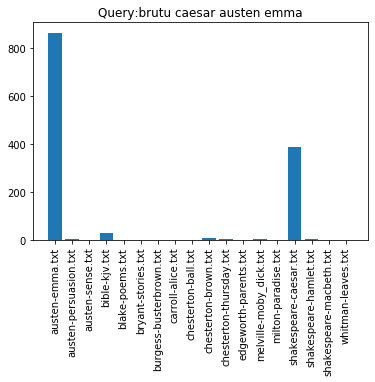

In [69]:
query = ["Brutus", "Caesar", "Austen", "the", "The", ";", "Emma"]

query = prepare_query(query)
results_unscaled = query_documents(tdm, names, query)

show_results(results_unscaled, nltk.corpus.gutenberg.fileids(), query)

This weighting reveals a problem with the term-frequency ranking, as documents where words from query occur twice as often as in other documents result in the double weight. A typical way to change this linear dependency is to use the logarithm. In the following the logarithm is implemented for scaling.
Two changes can be observed from the results:
1. The scores of both document are much closer to each other 
2. The score of _Caesar_ is higher than the score of _Emma_

This is a direct result of the summation of the logarithmic transformed weights.

### Adjusting Term-Frequency with logarithm

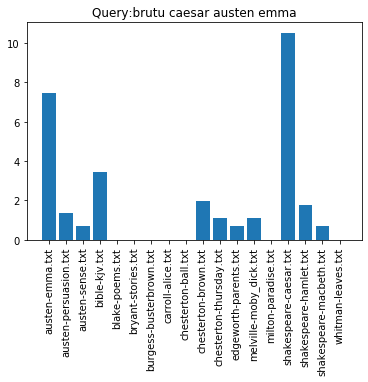

In [70]:
def scale_tf(m):
    return np.log1p(m)

tdm_tf = scale_tf(tdm)
#tdm_tf = np.log(test_tdm)
res_tf = query_documents(tdm_tf, names, query)

show_results(res_tf, nltk.corpus.gutenberg.fileids(), query)

## Further Adjustments with Inverse-Document-Frequency

As discussed elsewhere, term-frequency weighting has some negative effects if for words that occur often in the entire corpus. One approach to compensate for this behaviour is to use the the inverse document frequency.

The following implementation takes an unscaled TDM and applies the tf-idf scaling on the matrix.

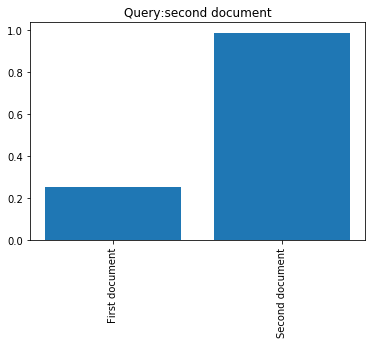

In [71]:
def scale_tfidf(m):
    m = scale_tf(m)
    tmp = m!=0
    num_documents = m.shape[1]
    
    idf = np.log(num_documents/m.sum(axis=1))
    return (m.T * idf).T

# test implementation
test_tdm_tfidf = scale_tfidf(test_tdm)
r = query_documents(test_tdm_tfidf, test_names, testquery)
show_results(r, query=testquery, document_names=["First document", "Second document"])

Applying the TF-IDF weighting to the corpus shows again that the document _Emma_ is slightly more relevant as the document _Caesar_. The reason is that the words _Caesar_ and _Brutus_ appear more often in the corpus than the word _Emma_.

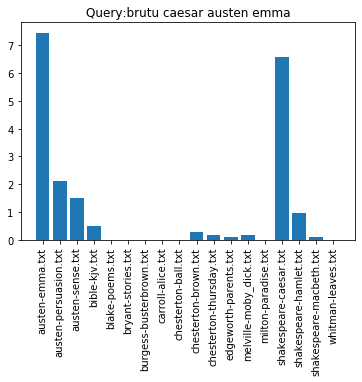

In [72]:
# scale Term-document matrix
tdm_tfidf = scale_tfidf(tdm)
results_tfidf = query_documents(tdm_tfidf, names, query)
show_results(results_tfidf, query=query, document_names=nltk.corpus.gutenberg.fileids())